In [ ]:
!pip install peewee

     |████████████████████████████████| 855 kB 4.9 MB/s 
  Created wheel for peewee: filename=peewee-3.14.10-cp37-cp37m-linux_x86_64.whl size=616230 sha256=522b73c1e7a498230d5ed4400663ef2f072eb3da90188738fa42a5ce52a602d7
  Stored in directory: /root/.cache/pip/wheels/df/4f/73/3228affbec8e2e73e622306ac47ebba39df2170bd784eec69c
Successfully built peewee


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import peewee

db_features_one = peewee.SqliteDatabase("/content/drive/MyDrive/diss_data/features_one.db")
db_features_two = peewee.SqliteDatabase("/content/drive/MyDrive/diss_data/features_two.db")
db_features_three = peewee.SqliteDatabase("/content/drive/MyDrive/diss_data/features_three.db")


class ExtractedFeaturesOne(peewee.Model):
    user_id = peewee.IntegerField()
    data_split_type = peewee.IntegerField()
    feature_array = peewee.BlobField()

    class Meta:
        database = db_features_one
        legacy_table_names = False


class ExtractedFeaturesTwo(peewee.Model):
    user_id = peewee.IntegerField()
    data_split_type = peewee.IntegerField()
    feature_array = peewee.BlobField()

    class Meta:
        database = db_features_two
        legacy_table_names = False


class ExtractedFeaturesThree(peewee.Model):
    user_id = peewee.IntegerField()
    data_split_type = peewee.IntegerField()
    feature_array = peewee.BlobField()

    class Meta:
        database = db_features_three
        legacy_table_names = False


db_features_one.create_tables(
    [
        ExtractedFeaturesOne,
        ExtractedFeaturesTwo,
        ExtractedFeaturesThree
    ]
)


/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
from tqdm import tqdm, trange
from imblearn.over_sampling import SMOTE
import json


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

In [ ]:
pipe = Pipeline([('smote', SMOTE()), ('scaler', StandardScaler()), ('svc', LinearSVC())])

In [ ]:
f = open("/content/drive/MyDrive/diss_data/suspicious_network.json")
sus_raw = json.load(f)
sus = [int(sus) for sus in sus_raw]
f.close()


In [ ]:
len(sus)


43

In [ ]:
def get_data(query, X, y):
  for feature in tqdm(query):
    X.append(json.loads(feature.feature_array.decode('utf-8')))
    y.append(feature.user_id)


In [ ]:
train_X = []
train_y = []

In [ ]:
query = ExtractedFeaturesOne.select().where((ExtractedFeaturesOne.data_split_type == 0) & (ExtractedFeaturesOne.user_id << sus))
get_data(query, train_X, train_y)


100%|██████████| 7478/7478 [00:00<00:00, 27282.84it/s]


In [ ]:
query = ExtractedFeaturesTwo.select().where((ExtractedFeaturesTwo.data_split_type == 0) & (ExtractedFeaturesTwo.user_id << sus))
get_data(query, train_X, train_y)


100%|██████████| 9247/9247 [00:00<00:00, 25662.46it/s]


In [ ]:
query = ExtractedFeaturesThree.select().where((ExtractedFeaturesThree.data_split_type == 0) & (ExtractedFeaturesThree.user_id << sus))
get_data(query, train_X, train_y)


100%|██████████| 5830/5830 [00:00<00:00, 28886.63it/s]


In [ ]:
(len(train_y) / 1873093) * 100

1.2041580423395954

In [ ]:
len(train_y) / len(sus)

524.5348837209302

In [ ]:
for thing in train_y:
    if thing not in sus:
        raise Exception("borked")


In [ ]:
pipe.fit(train_X, train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('smote', SMOTE()), ('scaler', StandardScaler()),
                ('svc', LinearSVC())])

In [ ]:
import pickle

filehandler = open("pipe_network.obj","wb")
pickle.dump(pipe, filehandler)
filehandler.close()


In [ ]:
test_X = []
test_y = []

In [ ]:
query = ExtractedFeaturesOne.select().where((ExtractedFeaturesOne.data_split_type == 1) & (ExtractedFeaturesOne.user_id << sus))
get_data(query, test_X, test_y)


100%|██████████| 3213/3213 [00:00<00:00, 29202.09it/s]


In [ ]:
query = ExtractedFeaturesTwo.select().where((ExtractedFeaturesTwo.data_split_type == 1) & (ExtractedFeaturesTwo.user_id << sus))
get_data(query, test_X, test_y)


100%|██████████| 3972/3972 [00:00<00:00, 27652.09it/s]


In [ ]:
query = ExtractedFeaturesThree.select().where((ExtractedFeaturesThree.data_split_type == 1) & (ExtractedFeaturesThree.user_id << sus))
get_data(query, test_X, test_y)


100%|██████████| 2506/2506 [00:00<00:00, 30484.65it/s]


In [ ]:
pipe.score(test_X, test_y)

0.3467134454648643

In [ ]:
y_predicted = pipe.predict(test_X)

In [ ]:
!pip install pycm

     |████████████████████████████████| 66 kB 2.4 MB/s 
     |████████████████████████████████| 590 kB 10.7 MB/s 


In [ ]:
from pycm import *
cm = ConfusionMatrix(actual_vector=test_y, predict_vector=y_predicted)

In [ ]:
cm.save_html("out")

{'Message': '/content/out.html', 'Status': True}

In [ ]:
cm.save_stat("out")

{'Message': '/content/out.pycm', 'Status': True}

In [ ]:
cm.save_csv("out")

{'Message': '/content/out.csv', 'Status': True}

In [ ]:
cm.save_report("out")

AttributeError: ignored

In [ ]:
cm.save_obj("cm")

{'Message': '/content/cm.obj', 'Status': True}

In [ ]:
!zip out_all.zip out* pipe*

  adding: out.csv (deflated 62%)
  adding: out.html (deflated 95%)
  adding: out_matrix.csv (deflated 66%)
  adding: out.pycm (deflated 82%)
  adding: pipe_network.obj (deflated 58%)


In [ ]:
from google.colab import files
files.download('out_all.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(cm)

Predict     199         389         694         1004        1060        1960        2204        2293        3915        4380        6196        6329        6334        7187        8678        8739        8765        9213        14453       14776       15087       15156       16914       22698       24937       36913       45751       47003       47134       49641       50276       50605       50904       52764       53444       58858       75445       76355       
Actual
199         127         27          14          25          28          17          12          16          14          20          10          16          16          34          23          16          24          17          25          8           7           11          27          2           9           10          20          20          37          2           15          11          15          18          9           25          16          3           

389         1           66          0           2     

/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:206: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


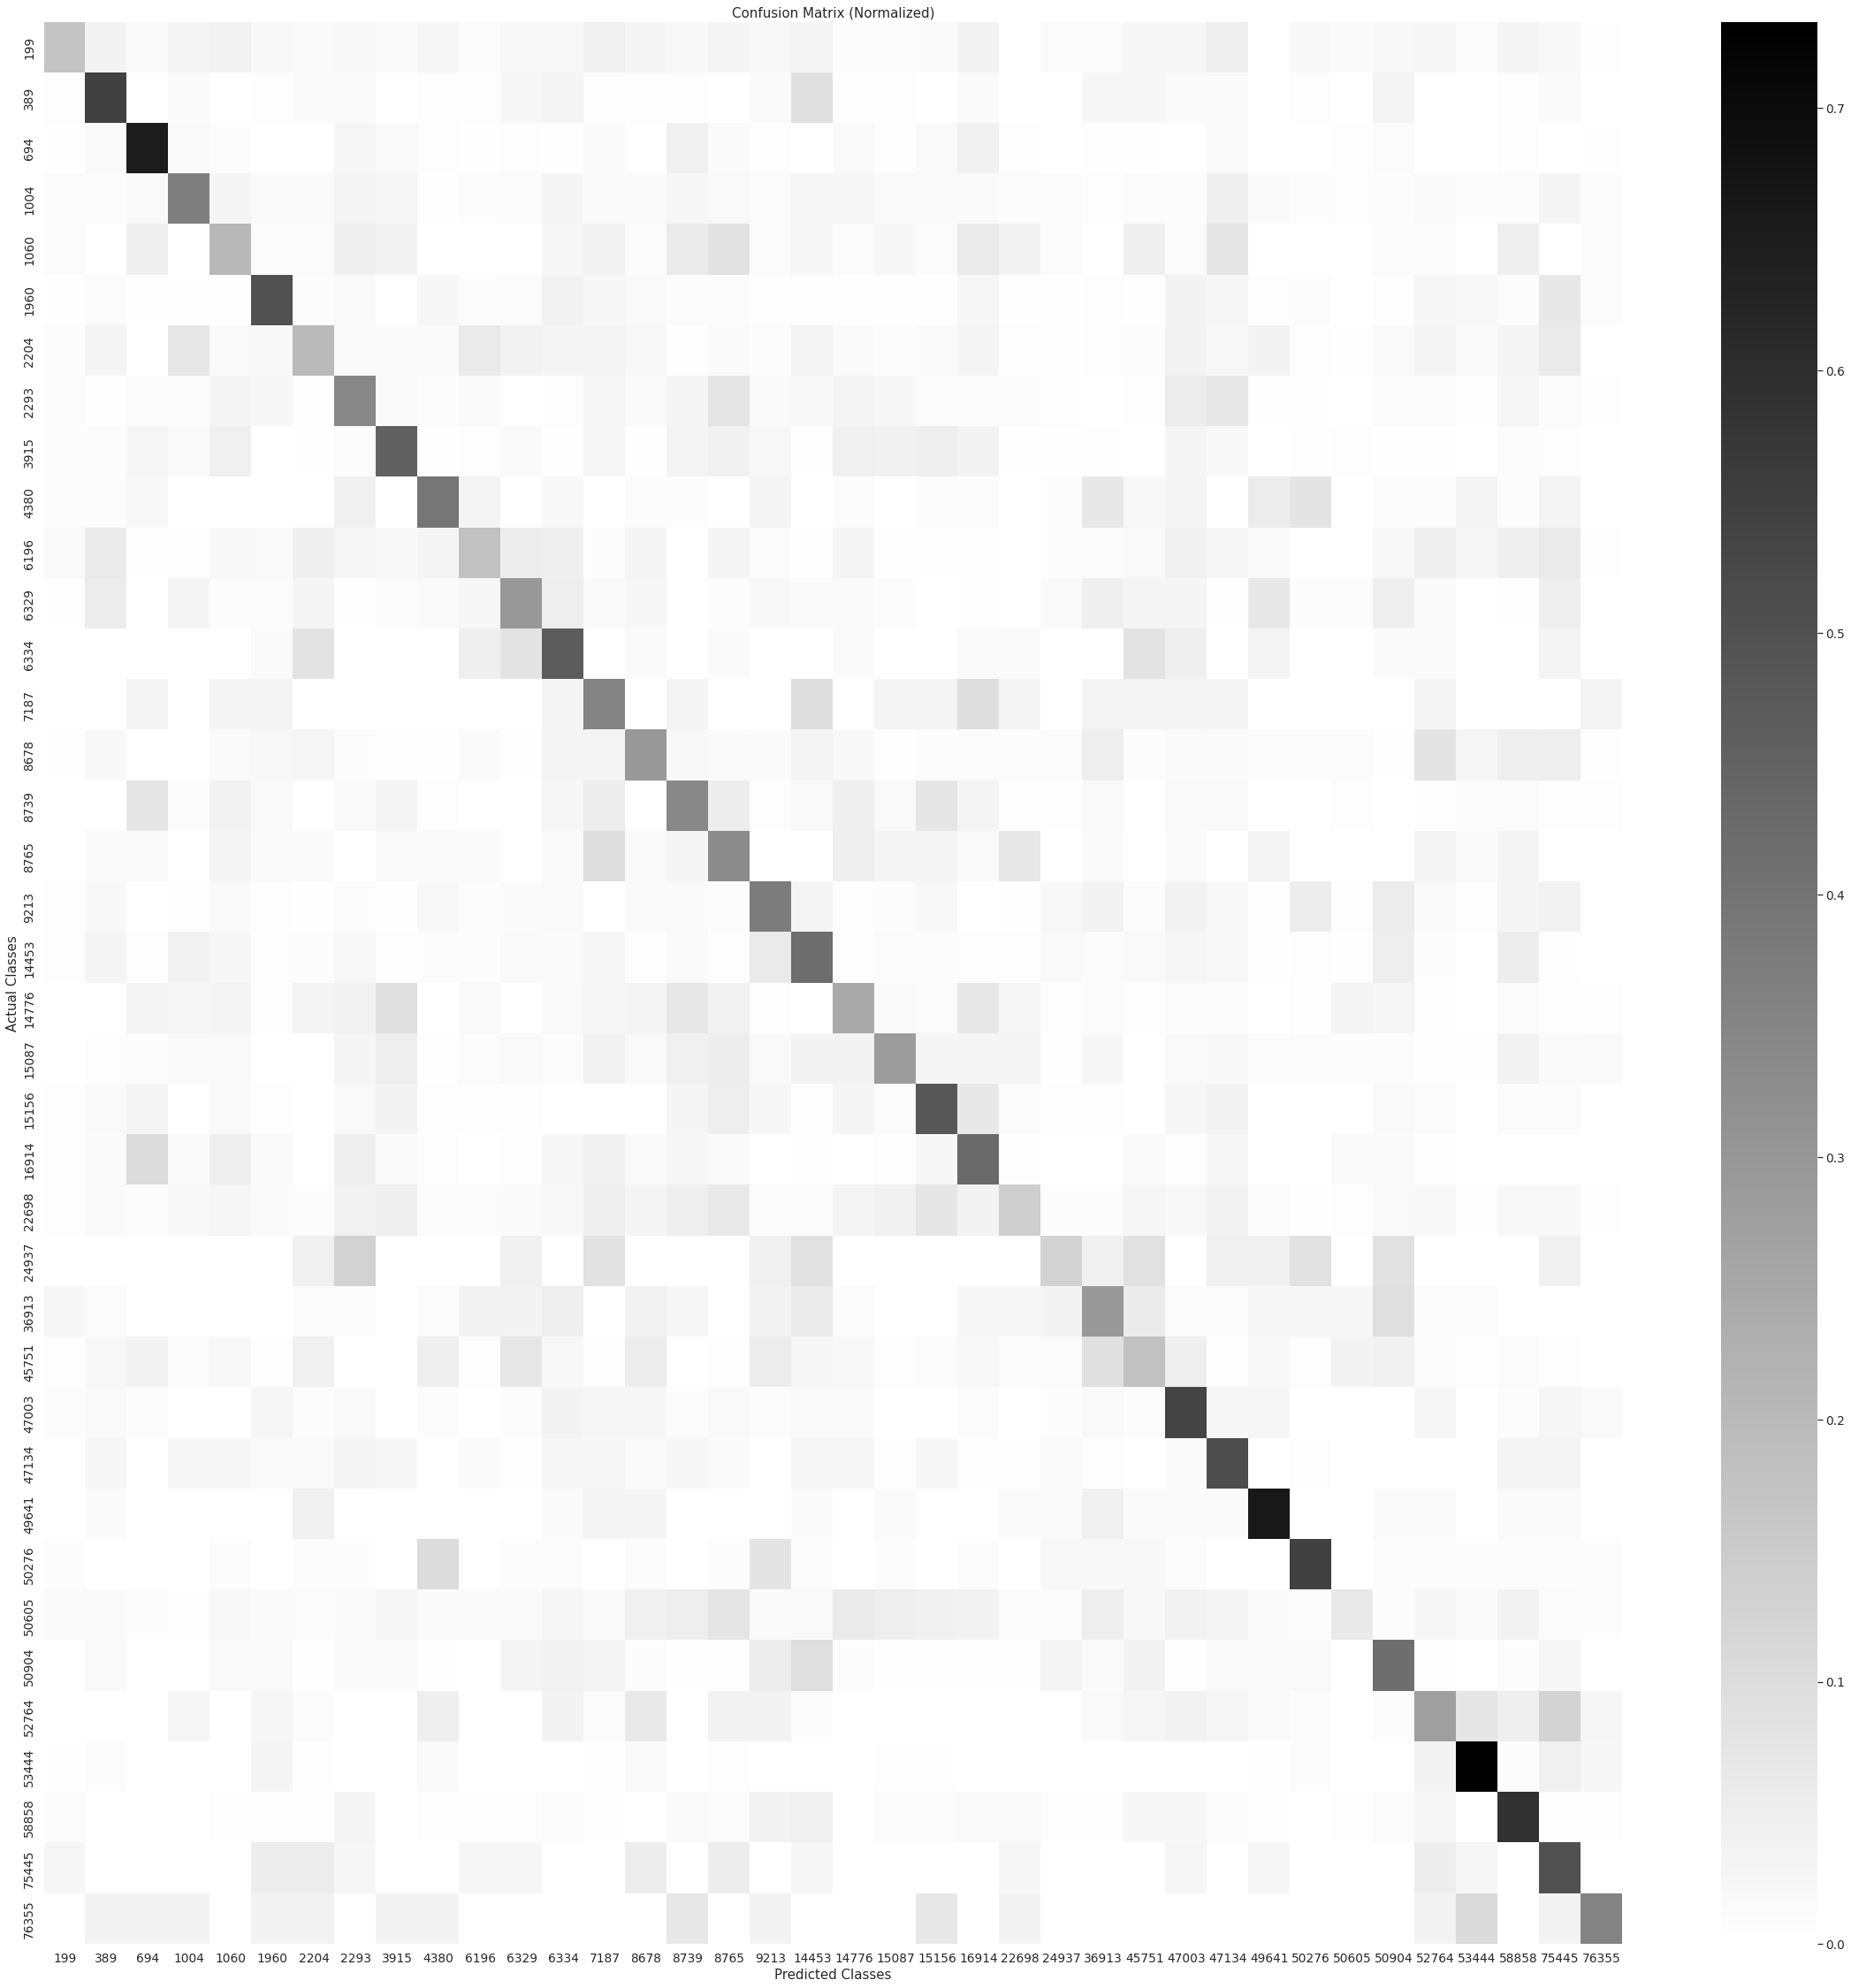

In [ ]:
sns.set(rc={'figure.figsize':(40, 40)})
sns.set(font_scale=1.25)
cm.plot(normalized=True, plot_lib = "seaborn")
